In [ ]:
!pip install --upgrade polars
!pip install dataprep


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 75.1 MB/s eta 0:00:00
  

In [ ]:
!pip install prophet

In [ ]:
# prompt: tools for data processing , data cleaning and data visualising

# **Data processing libraries:**
import pandas as pd  # Data analysis and manipulation
import numpy as np  # Numerical computing
from prophet import Prophet
# **Data cleaning libraries:**
import missingno as msno  # Missing data visualization and imputation
import dataprep.clean  # Data cleaning and preparation
%matplotlib inline
# **Data visualization libraries:**
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # 2D and 3D plotting
import plotly.express as px  # Interactive visualizations
import plotly.graph_objects as go  # Interactive data visualization
import polars as pl
# **Machine learning libraries:**
import sklearn  # Machine learning algorithms
from IPython.core.pylabtools import figsize
figsize(12, 4)
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/prediction energy behavior of prosumer/data'

In [ ]:
file= file_path + '/consommation_clean.csv'

In [ ]:
data=pd.read_csv(file)

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439422 entries, 0 to 439421
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime                439422 non-null  object 
 1   product_type            439422 non-null  int64  
 2   county                  439422 non-null  int64  
 3   eic_count               439422 non-null  int64  
 4   installed_capacity      439422 non-null  float64
 5   is_business             439422 non-null  int64  
 6   target                  439422 non-null  float64
 7   temperature             439422 non-null  float64
 8   dewpoint                439422 non-null  float64
 9   rain                    439422 non-null  float64
 10  snowfall                439422 non-null  float64
 11  surface_pressure        439422 non-null  float64
 12  cloudcover_total        439422 non-null  float64
 13  windspeed_10m           439422 non-null  float64
 14  winddirection_10m   

In [ ]:
# prompt: get les valeur NAAN

missing_values = data.isna().sum()
print(missing_values)


datetime                  0
product_type              0
county                    0
eic_count                 0
installed_capacity        0
is_business               0
target                    0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
lowest_price_per_mwh      0
highest_price_per_mwh     0
elect_prices              0
hour                      0
dayofweek                 0
quarter                   0
month                     0
year                      0
dayofyear                 0
day                       0
dtype: int64


<ipython-input-17-3d49617dd1f2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


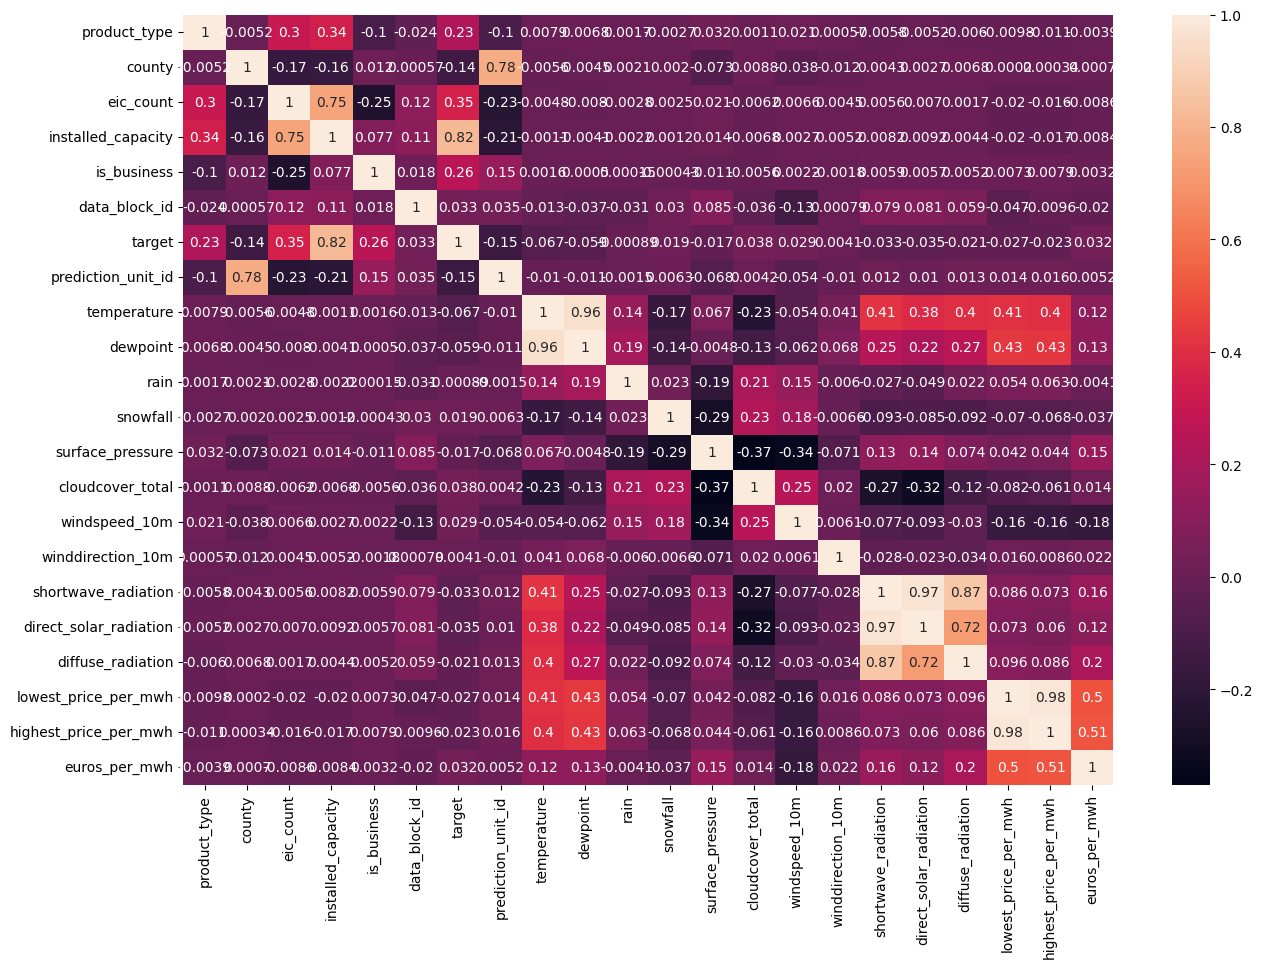

In [ ]:
# prompt: # Create a heatmap of the correlation matrix sns.heatmap(correlation_matrix, annot=True) plt.show() modifie the size of figure

correlation_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(correlation_matrix, annot=True, ax=ax)

plt.show()


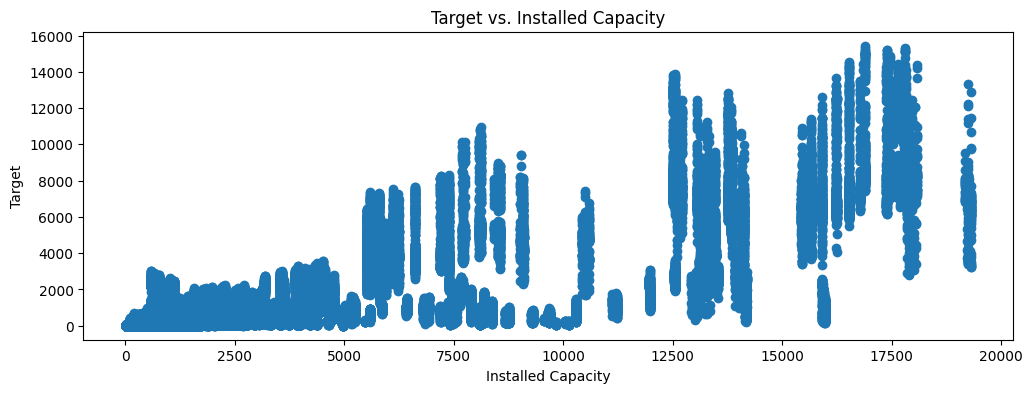

Correlation between installed capacity and target: 0.8190610646713914


In [ ]:
# prompt: I want to figure the target en fonction de installed capacity

# Create a scatter plot with installed capacity on the x-axis and target on the y-axis
plt.scatter(data['installed_capacity'], data['target'])

# Add a title and axis labels
plt.title('Target vs. Installed Capacity')
plt.xlabel('Installed Capacity')
plt.ylabel('Target')

# Show the plot
plt.show()

# Calculate the correlation coefficient between installed capacity and target
correlation = data['installed_capacity'].corr(data['target'])

# Print the correlation coefficient
print('Correlation between installed capacity and target:', correlation)


**Feature creation** ✅

---



In [ ]:
def create_features(df):
    # Assuming df's index is a DateTimeIndex
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek  # Use 'dayofweek' instead of 'day_of_week'
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['day'] = df.index.day # Use 'dayofyear' instead of 'day_of_year'
    return df


In [ ]:
# prompt: convert the type of datetime to datetime

data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index('datetime')


In [ ]:
data= create_features(data)

In [ ]:
data.reset_index(inplace=True)
data.rename(columns={'index': 'datetime'}, inplace=True)

In [ ]:
def impute_target(group):
    # Make sure the group is sorted by date if it's not already
    group = group.sort_values('date')
    # Loop through each row in the group
    for i in range(1, len(group) - 1):
        # Check if the target value is NaN
        if np.isnan(group.iloc[i]['target']):
            # Calculate the mean of the target values at the previous and next row, if both are not NaN
            prev_val = group.iloc[i-1]['target']
            next_val = group.iloc[i+1]['target']
            if not np.isnan(prev_val) and not np.isnan(next_val):
                group.iloc[i, group.columns.get_loc('target')] = (prev_val + next_val) / 2
    return group

# Apply the impute function to each group
imputed_data = data.groupby(['product_type', 'county', 'is_business', 'date','prediction_unit_id', 'data_block_id']).apply(impute_target)

# Reset index if necessary
imputed_data = imputed_data.reset_index(drop=True)

# Now imputed_data should have the 'target' column imputed within each group
print(imputed_data)


<ipython-input-128-7a40a478b8d0>:16: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  imputed_data = data.groupby(['product_type', 'county', 'is_business', 'date','prediction_unit_id', 'data_block_id']).apply(impute_target)


        product_type  county  eic_count  installed_capacity  is_business  \
0                  0       0          5              400.00            1   
1                  0       4         10              855.00            1   
2                  0       5          5             1160.00            1   
3                  0       7         14             2018.60            1   
4                  1       0        108              952.89            0   
...              ...     ...        ...                 ...          ...   
453977             3      13        236            10128.20            1   
453978             3      14        222             2787.18            0   
453979             3      14         95             4776.10            1   
453980             3      15        161             2035.75            0   
453981             3      15         55             2188.20            1   

              date  data_block_id    target  prediction_unit_id  temperature  \
0      

In [ ]:
data=imputed_data

In [ ]:
data = data.drop(columns=['date', 'data_block_id', 'prediction_unit_id'])

In [ ]:
data.rename(columns={'euros_per_mwh':'elect_prices'}, inplace=True)

In [ ]:
data

,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,0,0,5,400.00,1,59.000,13.600000,10.600000,0.000000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,0,4,10,855.00,1,247.823,11.666667,9.800000,0.000000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,0,5,5,1160.00,1,1063.080,11.875000,9.650000,0.000000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,0,7,14,2018.60,1,546.772,12.120000,10.600000,0.000000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,1,0,108,952.89,0,96.590,13.600000,10.600000,0.000000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453977,3,13,236,10128.20,1,205.388,15.700000,7.900000,0.000000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453978,3,14,222,2787.18,0,39.107,14.466667,7.733333,0.066667,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453979,3,14,95,4776.10,1,1878.775,14.466667,7.733333,0.066667,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453980,3,15,161,2035.75,0,8.980,15.680000,7.180000,0.040000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29


In [ ]:
# prompt: I want to diviser my dataframe into 80% for training and 20% for test

train_size = int(len(data) * 0.8)

train_data = data[:train_size]
test_data = data[train_size:]

print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")


Train data size: 363185
Test data size: 90797


In [ ]:
train_data

,datetime,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,2021-09-01 00:00:00,1,0,108,952.89,0,96.590,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,2021-09-01 00:00:00,2,0,17,166.40,0,17.314,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,2021-09-01 00:00:00,3,0,688,7207.88,0,656.859,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,2021-09-01 00:00:00,0,0,5,400.00,1,59.000,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,2021-09-01 00:00:00,1,0,43,1411.00,1,501.760,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,2023-01-23 04:00:00,1,13,14,138.70,0,16.101,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363181,2023-01-23 04:00:00,3,13,75,992.93,0,124.786,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363182,2023-01-23 04:00:00,1,13,10,268.00,1,46.499,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363183,2023-01-23 04:00:00,3,13,27,937.90,1,186.588,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23


In [ ]:
train_data.rename(columns={'euros_per_mwh':'elect_prices'}, inplace=True)

<ipython-input-13-5b61bcf66b34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.rename(columns={'euros_per_mwh':'elect_prices'}, inplace=True)


In [ ]:

train_data



,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,0,0,5,400.00,1,59.000,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,0,4,10,855.00,1,247.823,11.666667,9.800000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,0,5,5,1160.00,1,1063.080,11.875000,9.650000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,0,7,14,2018.60,1,546.772,12.120000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,1,0,108,952.89,0,96.590,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,3,8,33,1180.20,1,417.838,-5.500000,-6.800000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363181,3,9,155,1793.31,0,306.195,-7.400000,-8.066667,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363182,3,9,35,943.08,1,288.166,-7.400000,-8.066667,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363183,3,10,208,2340.60,0,314.178,-4.850000,-5.925000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363185 entries, 0 to 363184
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_type            363185 non-null  int64  
 1   county                  363185 non-null  int64  
 2   eic_count               363185 non-null  int64  
 3   installed_capacity      363185 non-null  float64
 4   is_business             363185 non-null  int64  
 5   target                  363185 non-null  float64
 6   temperature             363185 non-null  float64
 7   dewpoint                363185 non-null  float64
 8   rain                    363185 non-null  float64
 9   snowfall                363185 non-null  float64
 10  surface_pressure        363185 non-null  float64
 11  cloudcover_total        363185 non-null  float64
 12  windspeed_10m           363185 non-null  float64
 13  winddirection_10m       363185 non-null  float64
 14  shortwave_radiation 

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363185 entries, 0 to 363184
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   datetime                363185 non-null  string 
 1   product_type            363185 non-null  int64  
 2   county                  363185 non-null  int64  
 3   eic_count               363185 non-null  int64  
 4   installed_capacity      363185 non-null  float64
 5   is_business             363185 non-null  int64  
 6   target                  363185 non-null  float64
 7   temperature             363185 non-null  float64
 8   dewpoint                363185 non-null  float64
 9   rain                    363185 non-null  float64
 10  snowfall                363185 non-null  float64
 11  surface_pressure        363185 non-null  float64
 12  cloudcover_total        363185 non-null  float64
 13  windspeed_10m           363185 non-null  float64
 14  winddirection_10m   

In [ ]:
train_data.reset_index(inplace=True)
train_data.rename(columns={'index': 'datetime'}, inplace=True)

In [ ]:
train_data

,datetime,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,2021-09-01 00:00:00,1,0,108,952.89,0,96.590,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,2021-09-01 00:00:00,2,0,17,166.40,0,17.314,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,2021-09-01 00:00:00,3,0,688,7207.88,0,656.859,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,2021-09-01 00:00:00,0,0,5,400.00,1,59.000,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,2021-09-01 00:00:00,1,0,43,1411.00,1,501.760,13.600000,10.600000,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,2023-01-23 04:00:00,1,13,14,138.70,0,16.101,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363181,2023-01-23 04:00:00,3,13,75,992.93,0,124.786,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363182,2023-01-23 04:00:00,1,13,10,268.00,1,46.499,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363183,2023-01-23 04:00:00,3,13,27,937.90,1,186.588,-6.100000,-7.300000,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23


*determiner les valeurs NAAN et quelle est la sollution ??
can we enter to our model and leave it NAAN*

In [ ]:
nan_counts = train_data.isna().sum()

# Add a new row with the column names and the number of NaN values
nan_counts = nan_counts.to_frame().T.rename(columns={0: 'count_nan'})

# Print the number of NaN values in each column
print(nan_counts)

   datetime  product_type  county  eic_count  installed_capacity  is_business  \
0         0             0       0          0                   0            0   

   target  temperature  dewpoint  rain  ...  lowest_price_per_mwh  \
0       0            0         0     0  ...                     0   

   highest_price_per_mwh  elect_prices  hour  dayofweek  quarter  month  year  \
0                      0             0     0          0        0      0     0   

   dayofyear  day  
0          0    0  

[1 rows x 28 columns]


In [ ]:
nan_counts = imputed_data.isna().sum()

# Add a new row with the column names and the number of NaN values
nan_counts = nan_counts.to_frame().T.rename(columns={0: 'count_nan'})

# Print the number of NaN values in each column
print(nan_counts)

   datetime  product_type  county  eic_count  installed_capacity  is_business  \
0         0             0       0          0                   0            0   

   date  data_block_id  target  temperature  ...  lowest_price_per_mwh  \
0     0              0       0            0  ...                     0   

   highest_price_per_mwh  elect_prices  hour  dayofweek  quarter  month  year  \
0                      0             0     0          0        0      0     0   

   dayofyear  day  
0          0    0  

[1 rows x 30 columns]


In [ ]:
# Step 1: Add the current index as a new column in the DataFrame
train_data['datetime'] = train_data.index

# Step 2: Reset the index without dropping the current index
train_data = train_data.reset_index(drop=False)


In [ ]:
train_data

,index,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,...,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day,datetime
0,0,1,0,108,952.89,0,96.590,13.600000,10.600000,0.0,...,46.32,92.51,0,2,3,9,2021,244,1,0
1,1,2,0,17,166.40,0,17.314,13.600000,10.600000,0.0,...,46.32,92.51,0,2,3,9,2021,244,1,1
2,2,3,0,688,7207.88,0,656.859,13.600000,10.600000,0.0,...,46.32,92.51,0,2,3,9,2021,244,1,2
3,3,0,0,5,400.00,1,59.000,13.600000,10.600000,0.0,...,46.32,92.51,0,2,3,9,2021,244,1,3
4,4,1,0,43,1411.00,1,501.760,13.600000,10.600000,0.0,...,46.32,92.51,0,2,3,9,2021,244,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,363180,1,13,14,138.70,0,16.101,-6.100000,-7.300000,0.0,...,71.91,108.55,4,0,1,1,2023,23,23,363180
363181,363181,3,13,75,992.93,0,124.786,-6.100000,-7.300000,0.0,...,71.91,108.55,4,0,1,1,2023,23,23,363181
363182,363182,1,13,10,268.00,1,46.499,-6.100000,-7.300000,0.0,...,71.91,108.55,4,0,1,1,2023,23,23,363182
363183,363183,3,13,27,937.90,1,186.588,-6.100000,-7.300000,0.0,...,71.91,108.55,4,0,1,1,2023,23,23,363183


In [ ]:
train_data= imputed_data


In [ ]:
train_data

,datetime,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id,target,temperature,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,2021-09-01 00:00:00,1,0,108,952.89,0,2021-09-01,1,96.590,13.600000,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,2021-09-01 00:00:00,2,0,17,166.40,0,2021-09-01,1,17.314,13.600000,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,2021-09-01 00:00:00,3,0,688,7207.88,0,2021-09-01,1,656.859,13.600000,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,2021-09-01 00:00:00,0,0,5,400.00,1,2021-09-01,1,59.000,13.600000,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,2021-09-01 00:00:00,1,0,43,1411.00,1,2021-09-01,1,501.760,13.600000,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,2023-01-23 04:00:00,1,13,14,138.70,0,2023-01-23,510,16.101,-6.100000,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363181,2023-01-23 04:00:00,3,13,75,992.93,0,2023-01-23,510,124.786,-6.100000,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363182,2023-01-23 04:00:00,1,13,10,268.00,1,2023-01-23,510,46.499,-6.100000,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363183,2023-01-23 04:00:00,3,13,27,937.90,1,2023-01-23,510,186.588,-6.100000,...,67.00,71.91,108.55,4,0,1,1,2023,23,23


**calculer l'information mutuelle pour chaque feature Ⓜ**


In [ ]:
# prompt: delete the date and data_block_id colomns

train_data.drop(columns=['datetime'], inplace=True)
train_data


,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
0,1,0,108,952.89,0,96.590,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
1,2,0,17,166.40,0,17.314,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
2,3,0,688,7207.88,0,656.859,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
3,0,0,5,400.00,1,59.000,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
4,1,0,43,1411.00,1,501.760,13.600000,10.600000,0.0,0.0,...,45.23,46.32,92.51,0,2,3,9,2021,244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363180,1,13,14,138.70,0,16.101,-6.100000,-7.300000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363181,3,13,75,992.93,0,124.786,-6.100000,-7.300000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363182,1,13,10,268.00,1,46.499,-6.100000,-7.300000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363183,3,13,27,937.90,1,186.588,-6.100000,-7.300000,0.0,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363185 entries, 0 to 363184
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   product_type            363185 non-null  int64  
 1   county                  363185 non-null  int64  
 2   eic_count               363185 non-null  int64  
 3   installed_capacity      363185 non-null  float64
 4   is_business             363185 non-null  int64  
 5   target                  363185 non-null  float64
 6   temperature             363185 non-null  float64
 7   dewpoint                363185 non-null  float64
 8   rain                    363185 non-null  float64
 9   snowfall                363185 non-null  float64
 10  surface_pressure        363185 non-null  float64
 11  cloudcover_total        363185 non-null  float64
 12  windspeed_10m           363185 non-null  float64
 13  winddirection_10m       363185 non-null  float64
 14  shortwave_radiation 

In [ ]:
ds = train_data.drop('target', axis=1)  # X contient toutes les colonnes sauf la colonne 'label'
y = train_data['target']

In [ ]:
features = X.columns.tolist()
print(features)

['product_type', 'county', 'eic_count', 'installed_capacity', 'is_business', 'temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure', 'cloudcover_total', 'windspeed_10m', 'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation', 'diffuse_radiation', 'lowest_price_per_mwh', 'highest_price_per_mwh', 'elect_prices', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'day']


In [ ]:
# prompt: concatain ds and y

df = pd.concat([ds, y], axis=1)


AttributeError: 'DataFrame' object has no attribute 'history'

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

mi_scores = mutual_info_regression(X, Y)


mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])

mi_scores_sorted = mi_scores_df.sort_values(by='MI Score', ascending=False)


print(mi_scores_sorted)



                        MI Score
installed_capacity      1.533949
eic_count               0.699983
county                  0.278261
product_type            0.234448
is_business             0.158573
dayofyear               0.110291
highest_price_per_mwh   0.101588
lowest_price_per_mwh    0.101381
temperature             0.087732
dewpoint                0.073924
month                   0.068897
elect_prices            0.041621
shortwave_radiation     0.041612
diffuse_radiation       0.040756
direct_solar_radiation  0.039185
quarter                 0.038977
surface_pressure        0.028877
hour                    0.024747
cloudcover_total        0.023642
winddirection_10m       0.021617
windspeed_10m           0.020706
snowfall                0.018181
year                    0.011411
rain                    0.010486
dayofweek               0.006060
day                     0.004781


In [ ]:
# prompt: calcluler l'importance de feature consernant target

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(train_data.drop('target', axis=1), train_data['target'])

# Calculate feature importances
importances = model.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({
    'feature': train_data.drop('target', axis=1).columns,
    'importance': importances
})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)


                   feature  importance
3       installed_capacity    0.773458
4              is_business    0.073159
2                eic_count    0.046281
19                    hour    0.028774
20               dayofweek    0.025160
24               dayofyear    0.009028
14  direct_solar_radiation    0.008773
5              temperature    0.007557
1                   county    0.006894
13     shortwave_radiation    0.006570
0             product_type    0.002407
17   highest_price_per_mwh    0.002316
18            elect_prices    0.001537
16    lowest_price_per_mwh    0.001397
6                 dewpoint    0.001016
25                     day    0.000956
9         surface_pressure    0.000945
15       diffuse_radiation    0.000746
23                    year    0.000702
12       winddirection_10m    0.000690
11           windspeed_10m    0.000548
10        cloudcover_total    0.000492
22                   month    0.000207
8                 snowfall    0.000190
7                     rai

In [ ]:
test_data = test_data.drop(columns=['datetime'])

In [ ]:
test_data


,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
363185,3,14,200,2499.05,0,331.945,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363186,1,14,17,387.60,1,197.657,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363187,3,14,89,4382.30,1,1062.041,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363188,1,15,44,304.40,0,72.909,-5.320000,-6.840000,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
363189,3,15,118,1492.89,0,168.706,-5.320000,-6.840000,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453977,1,15,51,415.60,0,9.870,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453978,3,15,161,2035.75,0,8.980,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453979,0,15,15,620.00,1,673.401,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453980,1,15,20,624.50,1,43.659,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29


,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,euros_per_mwh,hour,dayofweek,quarter,month,year,dayofyear,day
0,3,14,200,2499.05,0,331.945,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
1,1,14,17,387.60,1,197.657,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
2,3,14,89,4382.30,1,1062.041,-7.033333,-7.633333,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
3,1,15,44,304.40,0,72.909,-5.320000,-6.840000,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
4,3,15,118,1492.89,0,168.706,-5.320000,-6.840000,0.00,0.0,...,67.00,71.91,108.55,4,0,1,1,2023,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90792,1,15,51,415.60,0,9.870,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
90793,3,15,161,2035.75,0,8.980,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
90794,0,15,15,620.00,1,673.401,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
90795,1,15,20,624.50,1,43.659,15.680000,7.180000,0.04,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29


In [ ]:
x = test_data.drop('target', axis=1)  # X contient toutes les colonnes sauf la colonne 'label'
y = test_data['target']

In [ ]:
predictions = model.predict(x)

# If you want to add these predictions to your test_dataframe as a new column:
x['predictions'] = predictions

In [ ]:
test_data.tail(10)

,product_type,county,eic_count,installed_capacity,is_business,target,temperature,dewpoint,rain,snowfall,...,lowest_price_per_mwh,highest_price_per_mwh,elect_prices,hour,dayofweek,quarter,month,year,dayofyear,day
453972,3,10,228,2692.40,0,16.363,13.900000,6.375000,0.000000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453973,3,10,86,2600.60,1,448.868,13.900000,6.375000,0.000000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453974,3,11,699,8122.25,0,159.631,14.250000,8.050000,0.050000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453975,3,11,226,10527.60,1,5670.051,14.250000,8.050000,0.050000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453976,3,13,88,1155.43,0,23.736,15.700000,7.900000,0.000000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453977,3,13,236,10128.20,1,205.388,15.700000,7.900000,0.000000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453978,3,14,222,2787.18,0,39.107,14.466667,7.733333,0.066667,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453979,3,14,95,4776.10,1,1878.775,14.466667,7.733333,0.066667,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453980,3,15,161,2035.75,0,8.980,15.680000,7.180000,0.040000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29
453981,3,15,55,2188.20,1,365.050,15.680000,7.180000,0.040000,0.0,...,28.16,36.98,3.49,10,0,2,5,2023,149,29


In [ ]:
# prompt: determiner les valeurs NAAN de y

import pandas as pd

nan_counts = y.isna().sum()

# Convert the Series to a DataFrame
nan_counts = pd.Series(nan_counts)

# Add a new row with the column names and the number of NaN values
nan_counts = nan_counts.to_frame().T.rename(columns={0: 'count_nan'})

# Print the number of NaN values in each column
print(nan_counts)

   count_nan
0          0


In [ ]:
# prompt: I want evaluate this model

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(x)

mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
rmse = sqrt(mean_squared_error(y, y_pred))

print("Mean absolute error:", mae)
print("Mean absolute percentage error:", mape)
print("Root mean squared error:", rmse)


Mean absolute error: 114.13376079661224
Mean absolute percentage error: 335164085355148.9
Root mean squared error: 336.1931290779106


In [ ]:
y_pred

array([ 331.97943,  192.6959 , 1015.91585, ...,  588.48351,   58.0534 ,
        453.72091])

In [ ]:
# prompt: write a dataframe calculate la diferrence entre y and y_pred

import pandas as pd

# Create a new dataframe with the actual and predicted values
df = pd.DataFrame({'actual': y, 'predicted': y_pred})

# Calculate the difference between the actual and predicted values
df['difference'] = df['actual'] - df['predicted']

# Print the dataframe
print(df)


          actual   predicted  difference
363185   331.945   331.97943    -0.03443
363186   197.657   192.69590     4.96110
363187  1062.041  1015.91585    46.12515
363188    72.909    78.09079    -5.18179
363189   168.706   182.19682   -13.49082
...          ...         ...         ...
453977     9.870     6.01514     3.85486
453978     8.980    25.55639   -16.57639
453979   673.401   588.48351    84.91749
453980    43.659    58.05340   -14.39440
453981   365.050   453.72091   -88.67091

[90797 rows x 3 columns]


In [ ]:
# prompt: I want concatain the x  and df

final_df = pd.concat([x, df], axis=1)


In [ ]:
final_df.to_csv('./test.csv')

In [ ]:
final_df

,product_type,county,eic_count,installed_capacity,is_business,temperature,dewpoint,rain,snowfall,surface_pressure,...,hour,dayofweek,quarter,month,year,dayofyear,day,actual,predicted,difference
363185,3,14,200,2499.05,0,-7.033333,-7.633333,0.00,0.0,1032.166667,...,4,0,1,1,2023,23,23,331.945,331.97943,-0.03443
363186,1,14,17,387.60,1,-7.033333,-7.633333,0.00,0.0,1032.166667,...,4,0,1,1,2023,23,23,197.657,192.69590,4.96110
363187,3,14,89,4382.30,1,-7.033333,-7.633333,0.00,0.0,1032.166667,...,4,0,1,1,2023,23,23,1062.041,1015.91585,46.12515
363188,1,15,44,304.40,0,-5.320000,-6.840000,0.00,0.0,1024.780000,...,4,0,1,1,2023,23,23,72.909,78.09079,-5.18179
363189,3,15,118,1492.89,0,-5.320000,-6.840000,0.00,0.0,1024.780000,...,4,0,1,1,2023,23,23,168.706,182.19682,-13.49082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453977,1,15,51,415.60,0,15.680000,7.180000,0.04,0.0,1004.120000,...,10,0,2,5,2023,149,29,9.870,6.01514,3.85486
453978,3,15,161,2035.75,0,15.680000,7.180000,0.04,0.0,1004.120000,...,10,0,2,5,2023,149,29,8.980,25.55639,-16.57639
453979,0,15,15,620.00,1,15.680000,7.180000,0.04,0.0,1004.120000,...,10,0,2,5,2023,149,29,673.401,588.48351,84.91749
453980,1,15,20,624.50,1,15.680000,7.180000,0.04,0.0,1004.120000,...,10,0,2,5,2023,149,29,43.659,58.05340,-14.39440


In [ ]:
# prompt: detrminer rows contain difference >200

diff_df = final_df[final_df['difference'] > 200]
print(diff_df)


        product_type  county  eic_count  installed_capacity  is_business  \
363244             3      11        167             7739.75            1   
363261             0       0         29             1010.50            1   
363264             3       0        422            17392.08            1   
363309             3      11        167             7739.75            1   
363317             3      14         89             4382.30            1   
...              ...     ...        ...                 ...          ...   
453857             0       0         25             1273.20            1   
453897             1      10         15              376.00            1   
453912             3      14         95             4776.10            1   
453921             0       0         25             1273.20            1   
453924             3       0        482            19314.31            1   

        temperature  dewpoint  rain  snowfall  surface_pressure  ...  hour  \
363244   

In [ ]:
!pip install python-dateutil

In [ ]:
final_df['year'] = final_df['year'].astype('int64')
final_df['month'] = final_df['month'].astype('int64')
final_df['day'] = final_df['day'].astype('int64')
final_df['hour'] = final_df['hour'].astype('int64')

In [ ]:
import pandas as pd

# Assuming final_df is your DataFrame and it has columns 'year', 'month', 'day', and 'hour'
final_df['datetime'] = pd.to_datetime(final_df[['year', 'month', 'day', 'hour']])


In [ ]:
final_df


,product_type,county,eic_count,installed_capacity,is_business,temperature,dewpoint,rain,snowfall,surface_pressure,...,dayofweek,quarter,month,year,dayofyear,day,actual,predicted,difference,datetime
363185,3,14,200,2499.05,0,-7.033333,-7.633333,0.00,0.0,1032.166667,...,0,1,1,2023,23,23,331.945,331.97943,-0.03443,2023-01-23 04:00:00
363186,1,14,17,387.60,1,-7.033333,-7.633333,0.00,0.0,1032.166667,...,0,1,1,2023,23,23,197.657,192.69590,4.96110,2023-01-23 04:00:00
363187,3,14,89,4382.30,1,-7.033333,-7.633333,0.00,0.0,1032.166667,...,0,1,1,2023,23,23,1062.041,1015.91585,46.12515,2023-01-23 04:00:00
363188,1,15,44,304.40,0,-5.320000,-6.840000,0.00,0.0,1024.780000,...,0,1,1,2023,23,23,72.909,78.09079,-5.18179,2023-01-23 04:00:00
363189,3,15,118,1492.89,0,-5.320000,-6.840000,0.00,0.0,1024.780000,...,0,1,1,2023,23,23,168.706,182.19682,-13.49082,2023-01-23 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453977,1,15,51,415.60,0,15.680000,7.180000,0.04,0.0,1004.120000,...,0,2,5,2023,149,29,9.870,6.01514,3.85486,2023-05-29 10:00:00
453978,3,15,161,2035.75,0,15.680000,7.180000,0.04,0.0,1004.120000,...,0,2,5,2023,149,29,8.980,25.55639,-16.57639,2023-05-29 10:00:00
453979,0,15,15,620.00,1,15.680000,7.180000,0.04,0.0,1004.120000,...,0,2,5,2023,149,29,673.401,588.48351,84.91749,2023-05-29 10:00:00
453980,1,15,20,624.50,1,15.680000,7.180000,0.04,0.0,1004.120000,...,0,2,5,2023,149,29,43.659,58.05340,-14.39440,2023-05-29 10:00:00


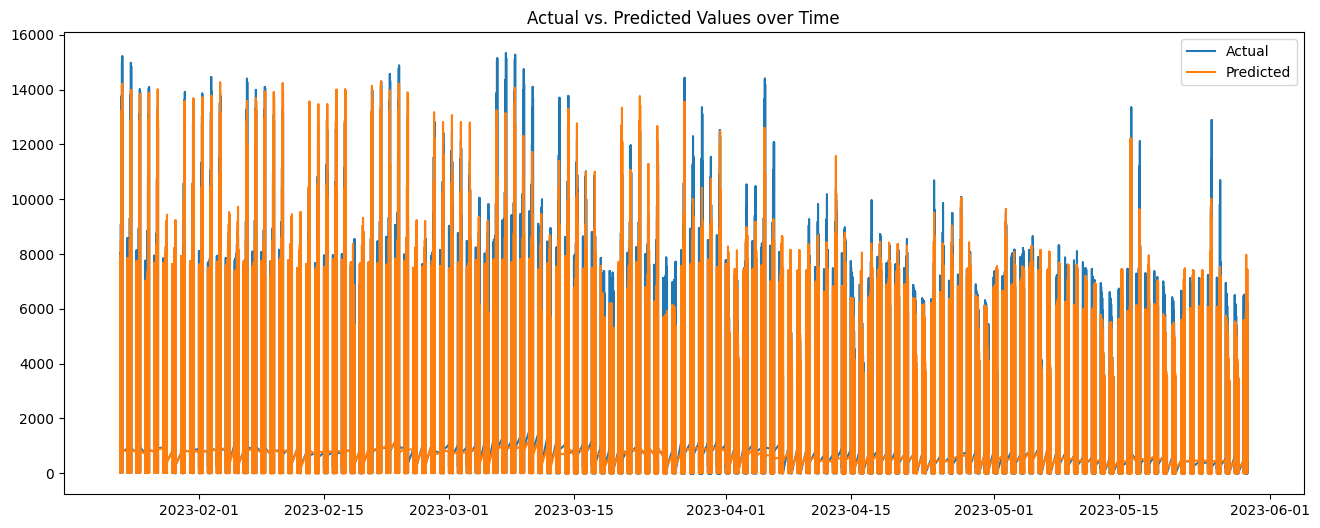

In [ ]:
# prompt: plot the evolution of target y and y_pred en fonction de datetime

import matplotlib.pyplot as plt

# Plot the actual and predicted values against the datetime index
plt.figure(figsize=(16, 6))
plt.plot(final_df['datetime'], final_df['actual'], label='Actual')
plt.plot(final_df['datetime'], final_df['predicted'], label='Predicted')

# Add a legend and title
plt.legend()
plt.title('Actual vs. Predicted Values over Time')

# Show the plot
plt.show()


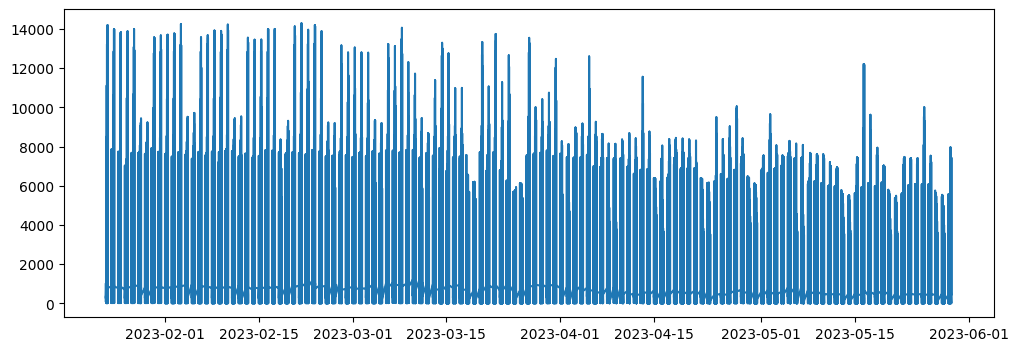

In [ ]:
plt.plot(final_df['datetime'], final_df['predicted'], label='Predicted')
plt.show()

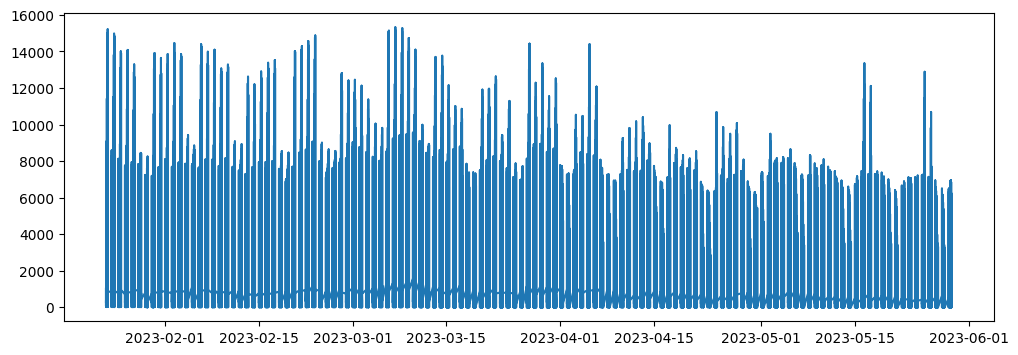

In [ ]:
plt.plot(final_df['datetime'], final_df['actual'], label='Actual')
plt.show()

In [ ]:

import matplotlib.pyplot as plt

# Group the DataFrame by 'county', 'product_type', and 'is_business'
grouped = final_df.groupby(['county', 'product_type', 'is_business'])

# Iterate over each group
for name, group in grouped:
    # name is a tuple containing the values of ('county', 'product_type', 'is_business') for the current group
    # group is the subset of the DataFrame corresponding to the current group

    plt.figure(figsize=(16, 6))

    # Sort the group by datetime to ensure correct plotting
    group = group.sort_values('datetime')

    # Plot the actual and predicted values against the datetime index
    plt.plot(group['datetime'], group['actual'], label='Actual')
    plt.plot(group['datetime'], group['predicted'], label='Predicted')

    # Add a legend and title
    plt.legend()

    # Create a title that includes the current group's information
    plt.title(f"Actual vs. Predicted Values over Time for County: {name[0]}, Product Type: {name[1]}, Is Business: {name[2]}")

    # Show the plot
    plt.show()

In [35]:
df=data.copy()

In [41]:
start_date = pd.Timestamp('2021-09-01 00:00:00')
end_date = pd.Timestamp('2021-11-01 00:00:00')

In [42]:
import pandas as pd

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Drop rows with missing values in 'target'
df = df.dropna(subset=['target'])

# Group the data by 'is_business', 'county', and 'product_type'
groups = df.groupby(['is_business', 'county', 'product_type'])

# Plotting
plt.figure(figsize=(14, 4))

for (is_business, county, product_type), group in groups:
    # Set the index to 'datetime' for this group
    group = group.set_index('datetime')

    # Infer the frequency and reindex (if necessary)
    group = group.asfreq(pd.infer_freq(group.index))

    # Filter by start and end date
    lim_group = group[start_date:end_date]

    # Plotting the 'target' for this group
    plt.plot(lim_group.index, lim_group['target'], label=f'{is_business}, {county}, {product_type}')

plt.title(' Over Time by Group', fontsize=20)
plt.ylabel('consumption', fontsize=16)
#plt.legend(title='Group: is_business, County, Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

for (is_business, county, product_type), group in groups:
    # Set the index to 'datetime' for this group
    group = group.set_index('datetime')

    # Infer the frequency and reindex (if necessary)
    group = group.asfreq(pd.infer_freq(group.index))

    # Filter by start and end date
    lim_group = group[start_date:end_date]
    plt.rc('figure', figsize=(14, 8))
    plt.rc('font', size=15)

    result = seasonal_decompose(lim_group['target'].dropna(), model='additive')
    fig = result.plot()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
# prompt: start_date and end_date is he max and the min of df.datetime

start_date = df['datetime'].min()
end_date = df['datetime'].max()

print(start_date)
print(end_date)


2021-09-01 00:00:00
2023-05-29 10:00:00


In [50]:
start_date = pd.Timestamp('2021-09-01 00:00:00')
end_date = pd.Timestamp('2021-10-01 00:00:00')

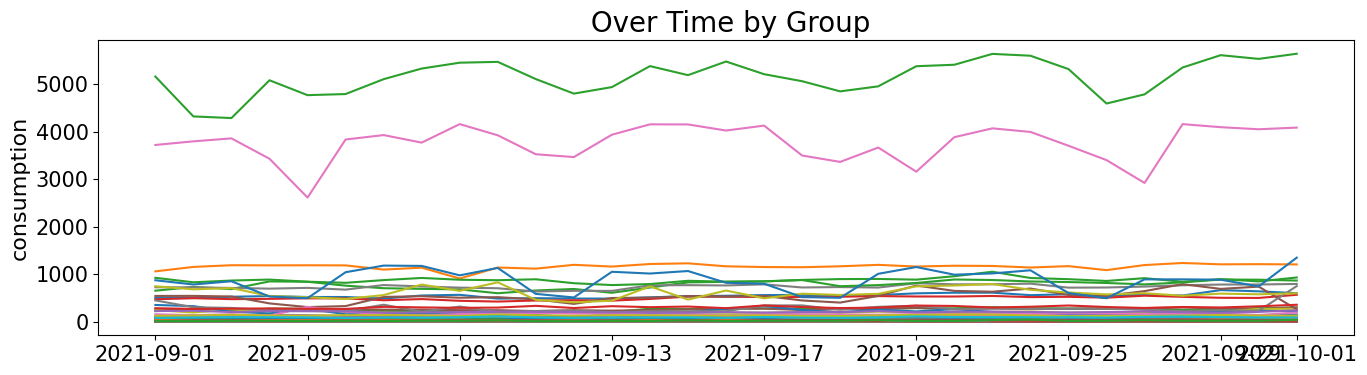

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

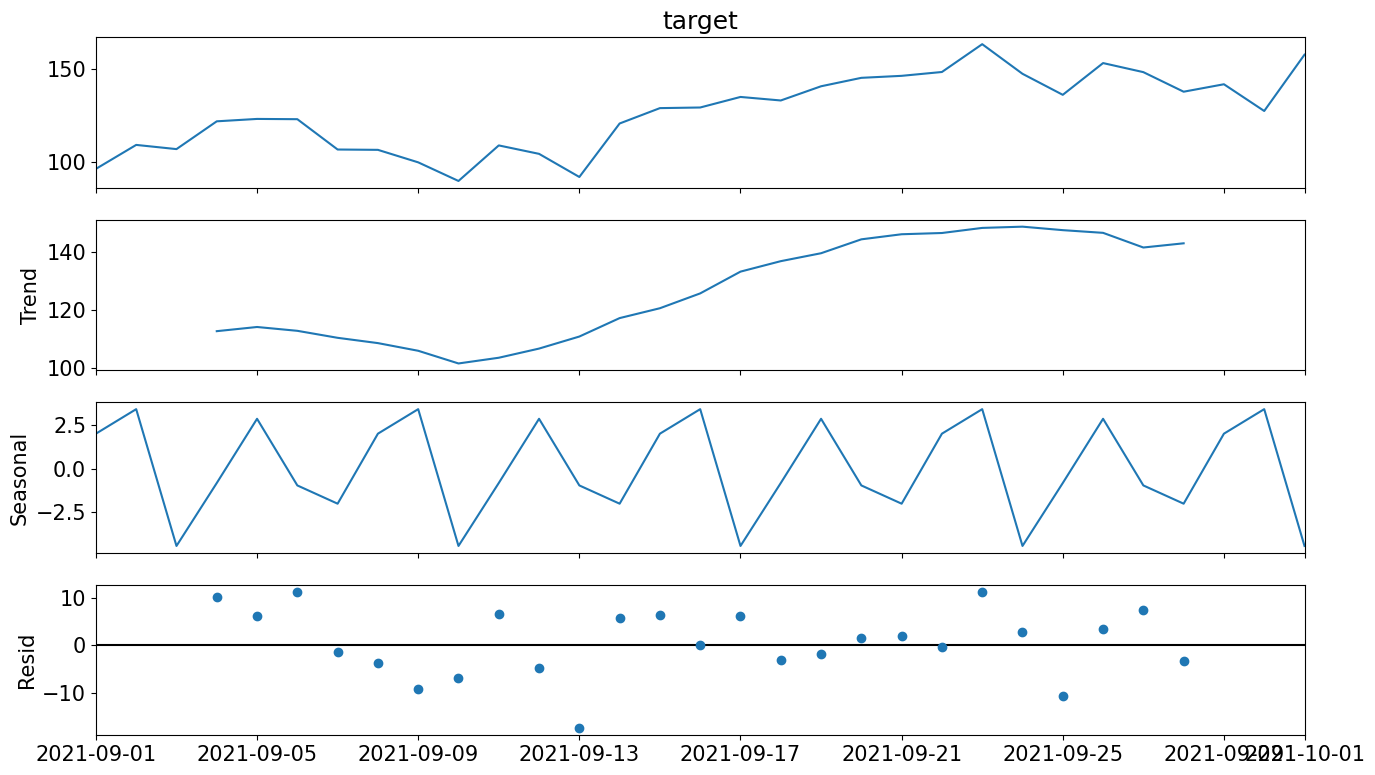

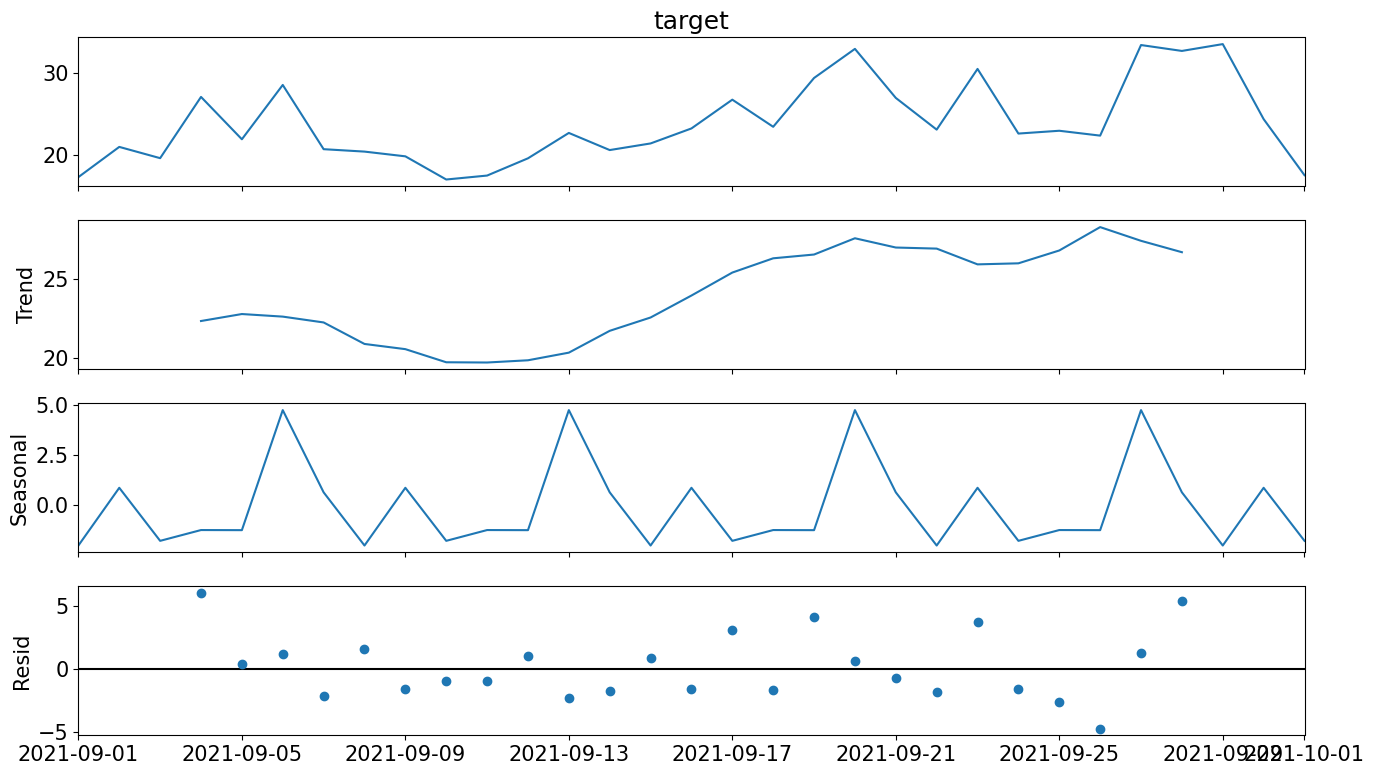

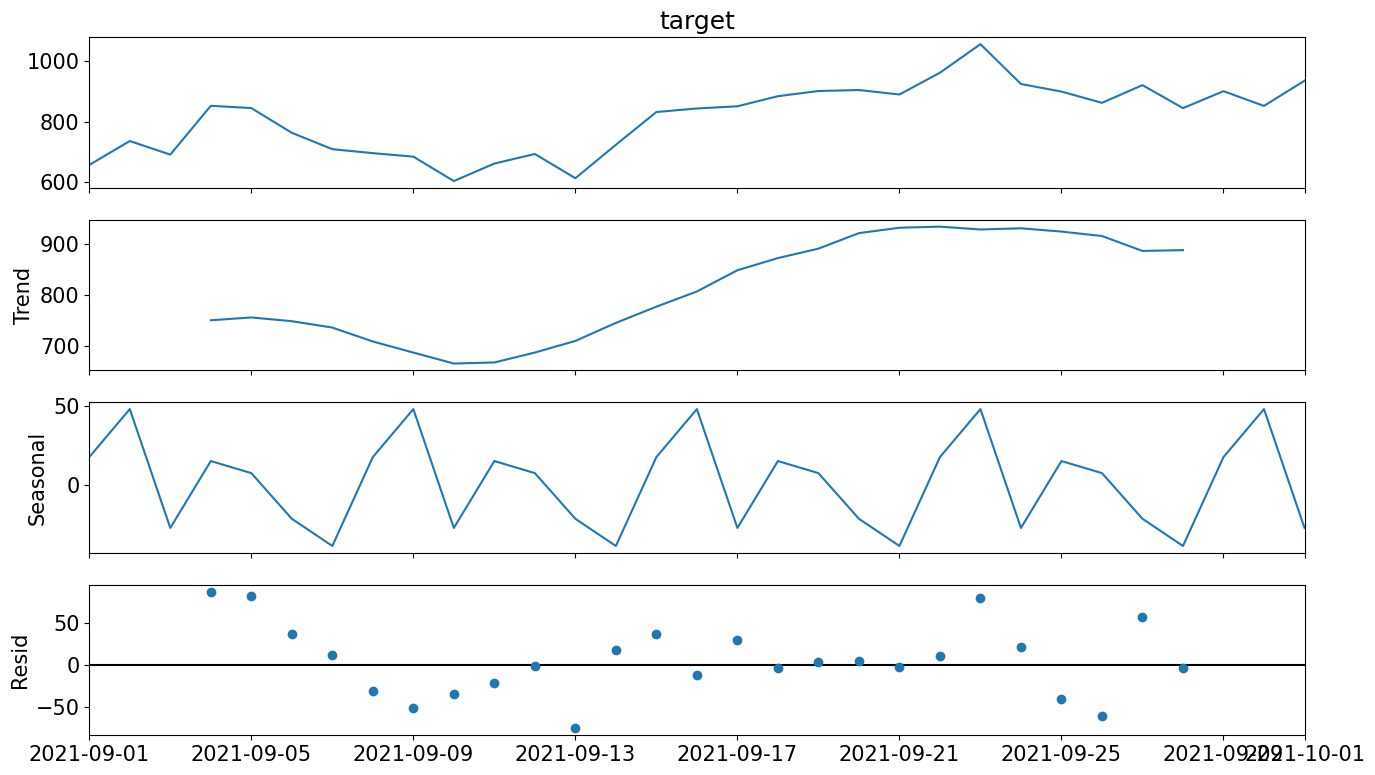

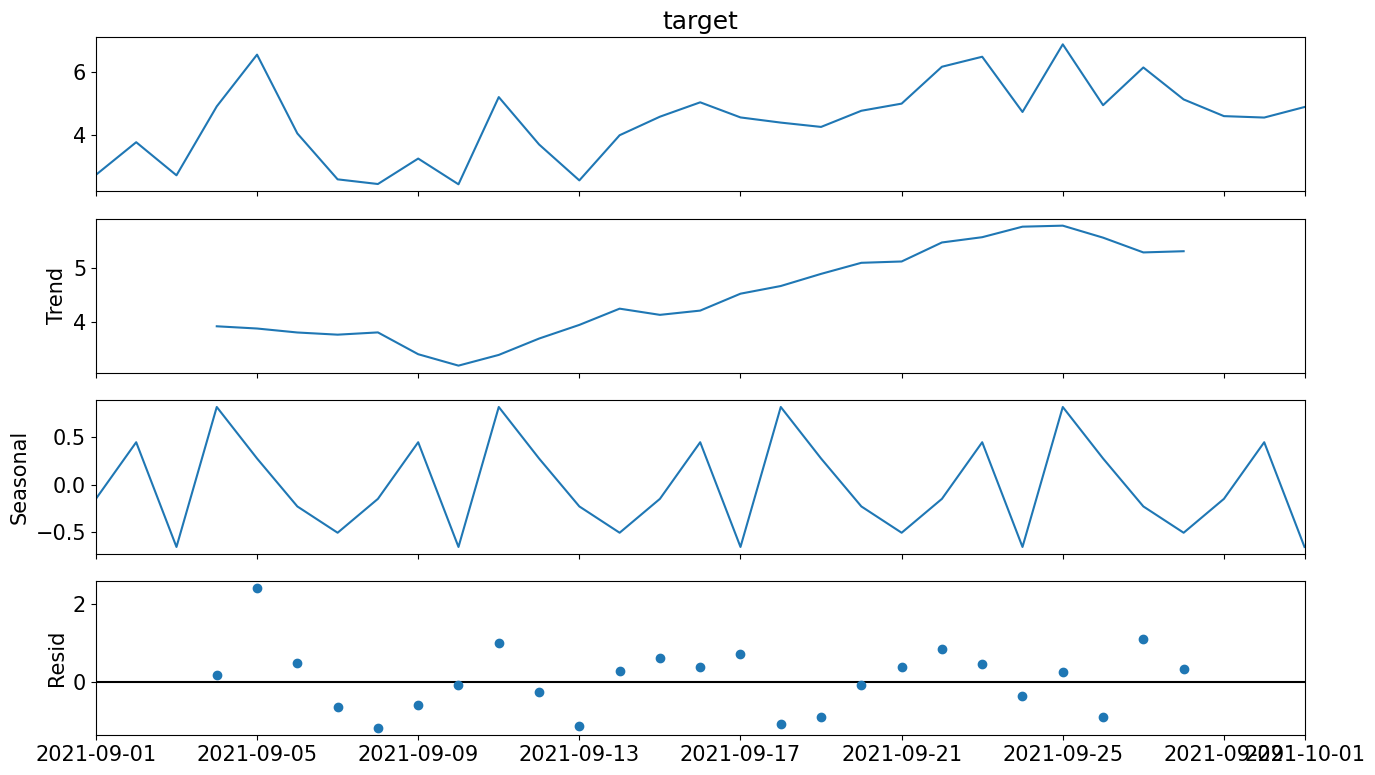

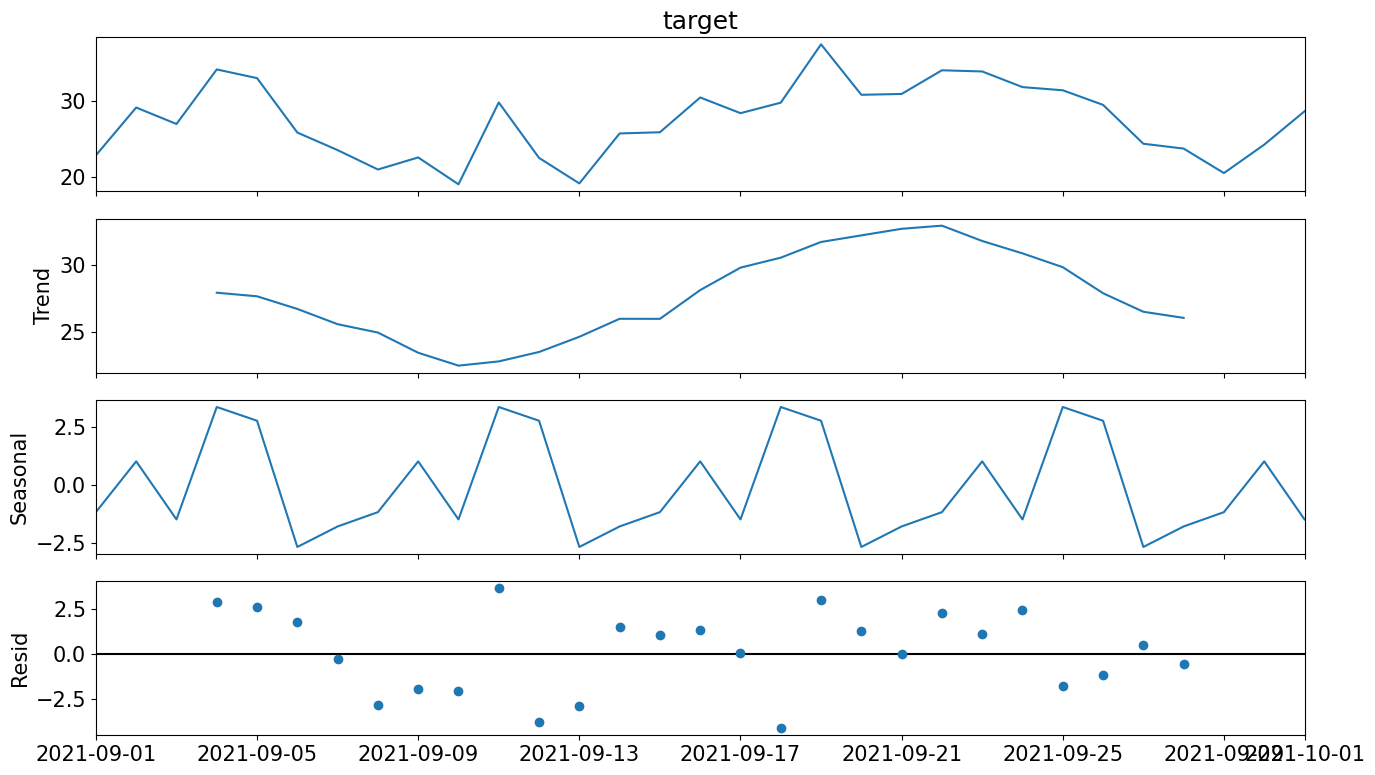

In [51]:
import pandas as pd

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Drop rows with missing values in 'target'
df = df.dropna(subset=['target'])

# Group the data by 'is_business', 'county', and 'product_type'
groups = df.groupby(['is_business', 'county', 'product_type'])

# Plotting
plt.figure(figsize=(14, 4))

for (is_business, county, product_type), group in groups:
    # Set the index to 'datetime' for this group
    group = group.set_index('datetime')

    # Infer the frequency and reindex (if necessary)
    group = group.asfreq(pd.infer_freq(group.index))

    # Filter by start and end date
    lim_group = group[start_date:end_date]

    # Plotting the 'target' for this group
    plt.plot(lim_group.index, lim_group['target'], label=f'{is_business}, {county}, {product_type}')

plt.title(' Over Time by Group', fontsize=20)
plt.ylabel('consumption', fontsize=16)
#plt.legend(title='Group: is_business, County, Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

for (is_business, county, product_type), group in groups:
    # Set the index to 'datetime' for this group
    group = group.set_index('datetime')

    # Infer the frequency and reindex (if necessary)
    group = group.asfreq(pd.infer_freq(group.index))

    # Filter by start and end date
    lim_group = group[start_date:end_date]
    plt.rc('figure', figsize=(14, 8))
    plt.rc('font', size=15)

    result = seasonal_decompose(lim_group['target'].dropna(), model='additive')
    fig = result.plot()

In [33]:
groups = train_data1.groupby(['is_business', 'county', 'product_type'])

for (is_business, county, product_type), group in groups:
    monthly_data = group['target'].resample('M').sum()

    # Check if there are at least 24 months of data
    if len(monthly_data) >= 24:
        decomposition = seasonal_decompose(monthly_data, model='additive')

        plt.figure(figsize=(14, 8))
        decomposition.seasonal.plot(title=f'Seasonality for {is_business}, {county}, {product_type}')
        plt.xlabel('Year')
        plt.ylabel('Seasonal Component')
        plt.show()
    else:
        print(f"Not enough data for {is_business}, {county}, {product_type}. Data points: {len(monthly_data)}")


Not enough data for 0, 0, 1. Data points: 21
Not enough data for 0, 0, 2. Data points: 21
Not enough data for 0, 0, 3. Data points: 21
Not enough data for 0, 1, 1. Data points: 21
Not enough data for 0, 1, 3. Data points: 21
Not enough data for 0, 2, 1. Data points: 20
Not enough data for 0, 2, 3. Data points: 21
Not enough data for 0, 3, 1. Data points: 21
Not enough data for 0, 3, 3. Data points: 21
Not enough data for 0, 4, 1. Data points: 21
Not enough data for 0, 4, 3. Data points: 21
Not enough data for 0, 5, 1. Data points: 21
Not enough data for 0, 5, 3. Data points: 21
Not enough data for 0, 7, 1. Data points: 21
Not enough data for 0, 7, 3. Data points: 21
Not enough data for 0, 8, 1. Data points: 21
Not enough data for 0, 8, 3. Data points: 21
Not enough data for 0, 9, 1. Data points: 21
Not enough data for 0, 9, 3. Data points: 21
Not enough data for 0, 10, 1. Data points: 21
Not enough data for 0, 10, 3. Data points: 21
Not enough data for 0, 11, 1. Data points: 21
Not eno